# load dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('AOOFFLDDS.csv')

df.head()

,message,label,Number of words
0,Sarara Ibsaa Finfinnee seenu san #Rasaasa tokk...,off,9.0
1,guyyaa seena qabessa guyyichi,non-off,4.0
2,ajefamuu qabbaa,off,2.0
3,yeroo ijolleen finfinee hidhamte sani ummata h...,off,19.0
4,guyyaa guyyaan oromoo ajefamu,off,4.0


In [3]:
def clean_text(text):
    '''Make text lowercase, remove text which is email and website link.'''
    text = str(text).lower()  
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    # Remove Emails
    text = re.sub(' \S*@\S*\s?', ' ', text)
   
    return text

In [4]:
df['Cleaned_Col_1'] = df['message'].apply(lambda x:clean_text(x))
df.head()

,message,label,Number of words,Cleaned_Col_1
0,Sarara Ibsaa Finfinnee seenu san #Rasaasa tokk...,off,9.0,sarara ibsaa finfinnee seenu san #rasaasa tokk...
1,guyyaa seena qabessa guyyichi,non-off,4.0,guyyaa seena qabessa guyyichi
2,ajefamuu qabbaa,off,2.0,ajefamuu qabbaa
3,yeroo ijolleen finfinee hidhamte sani ummata h...,off,19.0,yeroo ijolleen finfinee hidhamte sani ummata h...
4,guyyaa guyyaan oromoo ajefamu,off,4.0,guyyaa guyyaan oromoo ajefamu


In [5]:
#correected spell
data_spell = pd.read_csv("E:/111 Multilabel Paper Related/hate speech/anaconda/results/spelling-correction-1.csv", names =["correction","misspell"])
data_spell.head()

data_spell.misspell = data_spell.misspell.str.strip()
data_spell.misspell = data_spell.misspell.str.split(" ")

data_spell = data_spell.explode("misspell").reset_index(drop=True)

data_spell.drop_duplicates("misspell",inplace=True)

miss_corr = dict(zip(data_spell.misspell, data_spell.correction))

#Sample of the dict
{v:miss_corr[v] for v in [list(miss_corr.keys())[k] for k in range(20)]}

{'misspell': 'correction',
 'aanan': 'aanan',
 'aanu': 'aanu',
 'abbaa': 'abbaa',
 'abbeentaa': 'abbeentaa',
 'Abbentaafi': 'Abbentaafi',
 'achi-as-dhufa': 'achi-as-dhufa',
 "'achi": 'achi-as-dhufa',
 'as': 'achi-as-dhufa',
 "dhufan'": 'achi-as-dhufa',
 'adda': 'adda',
 'addaa': 'addaa',
 'addaan': 'addaan',
 'addunyaa': 'addunyaa',
 'Addunyummaa': 'Addunyummaa',
 'Adoolessa': 'Adoolessa',
 'Afaan': 'Afaan',
 'afaanii': 'afaanii',
 'Afaaniifi': 'Afaaniifi',
 'afaaniin': 'afaaniin'}

In [6]:
def correct_spell(v):
    for a in v.split(): 
        if a in miss_corr.keys(): 
            v = v.replace(a, miss_corr[a]) 
    return v
df["clean_content"] = df.Cleaned_Col_1.apply(lambda a : correct_spell(a))

df["clean_content"].head()

0    sarara ibsaa finfinnee seenu san #rasaasa tokk...
1                       guyyaa seena qabessa guyyichi 
2                                      ajefamuu qabbaa
3    yeroo ijolleen finfinee hidhamte sani ummata h...
4                        guyyaa guyyaan oromoo ajefamu
Name: clean_content, dtype: object

# To remove emojis

In [7]:
#to remove emoji
df_1 = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df_1

,message,label,Number of words,Cleaned_Col_1,clean_content
0,Sarara Ibsaa Finfinnee seenu san #Rasaasa tokk...,off,9.0,sarara ibsaa finfinnee seenu san #rasaasa tokk...,sarara ibsaa finfinnee seenu san #rasaasa tokk...
1,guyyaa seena qabessa guyyichi,non-off,4.0,guyyaa seena qabessa guyyichi,guyyaa seena qabessa guyyichi
2,ajefamuu qabbaa,off,2.0,ajefamuu qabbaa,ajefamuu qabbaa
3,yeroo ijolleen finfinee hidhamte sani ummata h...,off,19.0,yeroo ijolleen finfinee hidhamte sani ummata h...,yeroo ijolleen finfinee hidhamte sani ummata h...
4,guyyaa guyyaan oromoo ajefamu,off,4.0,guyyaa guyyaan oromoo ajefamu,guyyaa guyyaan oromoo ajefamu
...,...,...,...,...,...
3815,Wayittiin qabiyyee meeshaalee barnootaa walsim...,non-off,nan,wayittiin qabiyyee meeshaalee barnootaa walsim...,wayittiin qabiyyee meeshaalee barnootaa walsim...
3816,"Kaayyoo qorannoo kanaa galmaan ga'achuuf,qorat...",non-off,nan,"kaayyoo qorannoo kanaa galmaan ga'achuuf,qorat...","kaayyoo qorannoo kanaa galmaan ga'achuuf,qorat..."
3817,Kaayyoon kamuu kan galma ga'u madaallii kaayyo...,non-off,nan,kaayyoon kamuu kan galma ga'u madaallii kaayyo...,kaayyoon kamuu kan galma ga'u madaallii kaayyo...
3818,Madaallin adeemsaafi kaayyoo isaa irratti hund...,non-off,nan,madaallin adeemsaafi kaayyoo isaa irratti hund...,madaallin adeemsaafi kaayyoo isaa irratti hund...


# Remove stop words

In [8]:
AOstopword_list = open('E:/111 Multilabel Paper Related/hate speech/anaconda/results/AOstopwordlist.csv').read().splitlines()
#List = open("E:/PythonProgram/anaconda/AOstopwordlist.txt").readlines()
#AOstopword_list
#AOstopword_list

In [9]:
import re
from nltk.corpus import stopwords

corpus = []
for i in range(0, len(df_1['message'])):
    Tokenized = re.sub("[^a-zA-Z']", ' ', df_1['message'][i])
    #Tokenized = re.sub('[^a-zA-Z0-9\s]', ' ', df_1['message'][i])
    Tokenized = Tokenized.lower()
    Tokenized = Tokenized.split()
    
    
    #Tokenized = [word for word in Tokenized if not word in set('E:/PythonProgram/anaconda/AOstopwords.txt')]
    Tokenized = [word for word in Tokenized if not word in set(AOstopword_list)]
    
    #Tokenized = [word for word in Tokenized if not word in set(stopwords.words('E:/PythonProgram/anaconda/AOstopwordlist.cv'))]
    Tokenized = ' '.join(Tokenized)
    corpus.append(Tokenized)

In [10]:
df_1["corpus"] = corpus
df_1

,message,label,Number of words,Cleaned_Col_1,clean_content,corpus
0,Sarara Ibsaa Finfinnee seenu san #Rasaasa tokk...,off,9.0,sarara ibsaa finfinnee seenu san #rasaasa tokk...,sarara ibsaa finfinnee seenu san #rasaasa tokk...,sarara ibsaa finfinnee seenu rasaasa tokkotu g...
1,guyyaa seena qabessa guyyichi,non-off,4.0,guyyaa seena qabessa guyyichi,guyyaa seena qabessa guyyichi,seena qabessa guyyichi
2,ajefamuu qabbaa,off,2.0,ajefamuu qabbaa,ajefamuu qabbaa,ajefamuu qabbaa
3,yeroo ijolleen finfinee hidhamte sani ummata h...,off,19.0,yeroo ijolleen finfinee hidhamte sani ummata h...,yeroo ijolleen finfinee hidhamte sani ummata h...,ijolleen finfinee hidhamte sani ummata habasha...
4,guyyaa guyyaan oromoo ajefamu,off,4.0,guyyaa guyyaan oromoo ajefamu,guyyaa guyyaan oromoo ajefamu,guyyaan oromoo ajefamu
...,...,...,...,...,...,...
3815,Wayittiin qabiyyee meeshaalee barnootaa walsim...,non-off,nan,wayittiin qabiyyee meeshaalee barnootaa walsim...,wayittiin qabiyyee meeshaalee barnootaa walsim...,wayittiin qabiyyee meeshaalee barnootaa walsim...
3816,"Kaayyoo qorannoo kanaa galmaan ga'achuuf,qorat...",non-off,nan,"kaayyoo qorannoo kanaa galmaan ga'achuuf,qorat...","kaayyoo qorannoo kanaa galmaan ga'achuuf,qorat...",kaayyoo qorannoo galmaan ga'achuuf qorataan ra...
3817,Kaayyoon kamuu kan galma ga'u madaallii kaayyo...,non-off,nan,kaayyoon kamuu kan galma ga'u madaallii kaayyo...,kaayyoon kamuu kan galma ga'u madaallii kaayyo...,kaayyoon galma ga'u madaallii kaayyoosaniin wa...
3818,Madaallin adeemsaafi kaayyoo isaa irratti hund...,non-off,nan,madaallin adeemsaafi kaayyoo isaa irratti hund...,madaallin adeemsaafi kaayyoo isaa irratti hund...,madaallin adeemsaafi kaayyoo hundaa'uun gosa q...


In [11]:
#Tokenized = [word for word in Tokenized if not word in set(AOstopword_list)]
#Tokenized
#[^a-zA-z0-9\s]

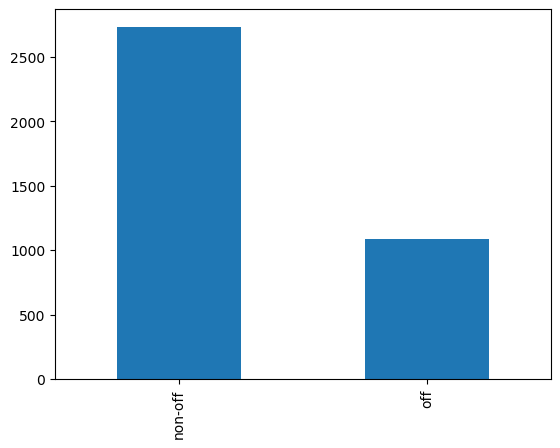

In [12]:
df_1['label'].value_counts().plot(kind='bar')
#colors=['r','g']
#plt.bar(range(0,1), df_1.sn.values, color=colors )
#plt.legend(['hate', 'not hate'] )

In [14]:
df_train_clean=df_1[['corpus','label']]
df_train_clean.head()

,corpus,label
0,sarara ibsaa finfinnee seenu rasaasa tokkotu g...,off
1,seena qabessa guyyichi,non-off
2,ajefamuu qabbaa,off
3,ijolleen finfinee hidhamte sani ummata habasha...,off
4,guyyaan oromoo ajefamu,off


In [17]:
print("With Stopword \n ===================")
example_review = df_1.iloc[149]
print(example_review['message'])
print("==========================\n")
print("After Stopword Removed \n ===============")
example_review = df_1.iloc[149]
print(example_review['corpus'])
print(example_review['label'])

With Stopword 
abbaan dhigaa wbo garuu yakka malee ajjeefamaa jiru.

After Stopword Removed 
dhigaa wbo yakka ajjeefamaa
off


# Create Model

In [18]:
#tfidf.get_feature_names()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BaseNB
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

from sklearn import svm
from sklearn.linear_model import LinearRegression

#tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, max_df=0.5, ngram_range=(2, 3))

#X_train, X_test, y_train, y_test = train_test_split(features, df_1['sn'], random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(df_1['corpus'], df_1['label'], random_state = 0, test_size=0.2)

tfidf_vectorize = TfidfVectorizer(sublinear_tf=True, min_df=2, ngram_range=(1, 2))


In [21]:
X_train_tfidf = tfidf_vectorize.fit_transform(X_train)

dv = pd.DataFrame(X_train_tfidf.todense(), columns= tfidf_vectorize.get_feature_names())
dv
#featuress = tfidf_vectorize.fit_transform(dX_train).T.to_csv("E:/PythonProgram/anaconda/TFIDFSTrain.csv")

,aa,aa ayyaana,aa bahii,aa bayii,aa deeggarra,aa dr,aa ga,aa guddaa,aa hidhaa,aa hojii,...,yunivarsiitii,yunivarsitii,yunvarsiitii,yuunvarsiitichaa,yuunvarsiitichi,yuunvarsiitii,yuunvarsiitin,zarii,zoonii,zoonii diinagdee
0,0.027405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3052,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3053,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3054,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
clf = SVC().fit(X_train_tfidf, y_train)
tree_clf = DecisionTreeClassifier().fit(X_train_tfidf, y_train)
rf_clf = RandomForestClassifier().fit(X_train_tfidf, y_train)
nav_clf = MultinomialNB().fit(X_train_tfidf, y_train)
lsvc_clf = LinearSVC().fit(X_train_tfidf, y_train)
#Base_clf = BaseNB().fit(X_train_tfidf, y_train)
Log_clf = LogisticRegression().fit(X_train_tfidf, y_train)

In [23]:
y_pred_svc = clf.predict(tfidf_vectorize.transform(X_test))
y_pred_tree = tree_clf.predict(tfidf_vectorize.transform(X_test))
y_pred_rf = rf_clf.predict(tfidf_vectorize.transform(X_test))
y_pred_nav = nav_clf.predict(tfidf_vectorize.transform(X_test))
y_pred_lsvc = lsvc_clf.predict(tfidf_vectorize.transform(X_test))
#y_pred_Base = Base_clf.predict(tfidf_vectorize.transform(X_test))
y_pred_Log = Log_clf.predict(tfidf_vectorize.transform(X_test))

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


print("SVC \n")
print(classification_report(y_test, y_pred_svc))
#pd.DataFrame(confusion_matrix(y_test, y_pred_svc), index=['1', '0'], columns=['1', '0'])


SVC 

              precision    recall  f1-score   support

     non-off       0.89      0.96      0.93       539
         off       0.89      0.71      0.79       225

    accuracy                           0.89       764
   macro avg       0.89      0.84      0.86       764
weighted avg       0.89      0.89      0.89       764



In [25]:
acc1 = print(accuracy_score(y_test, y_pred_svc))

0.8900523560209425


In [26]:
print(classification_report(y_test, y_pred_tree))
print("DecisionTreeClassifier \n")

#pd.DataFrame(confusion_matrix(y_test, y_pred_tree), index=['1', '0'], columns=['1', '0'])

              precision    recall  f1-score   support

     non-off       0.88      0.90      0.89       539
         off       0.74      0.69      0.71       225

    accuracy                           0.84       764
   macro avg       0.81      0.79      0.80       764
weighted avg       0.83      0.84      0.83       764

DecisionTreeClassifier 



In [29]:
acc123 = print(accuracy_score(y_test, y_pred_rf))

0.8651832460732984


In [30]:
print(classification_report(y_test, y_pred_nav))
print("MultinomialNB \n")

#pd.DataFrame(confusion_matrix(y_test, y_pred_nav), index=['1', '0'], columns=['1', '0'])

              precision    recall  f1-score   support

     non-off       0.87      0.97      0.92       539
         off       0.90      0.65      0.75       225

    accuracy                           0.88       764
   macro avg       0.89      0.81      0.84       764
weighted avg       0.88      0.88      0.87       764

MultinomialNB 

